In [29]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#cek data kosong
counts = df.isna().sum().sort_values(ascending=False)
#cek persen data kosong
percentages = round(df.isna().mean() * 100, 3).sort_values(ascending=False)
#gabungkan
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
company,112593,94.307
agent,16340,13.686
city,488,0.409
children,4,0.003
hotel,0,0.000
is_repeated_guest,0,0.000
total_of_special_requests,0,0.000
required_car_parking_spaces,0,0.000
adr,0,0.000
customer_type,0,0.000


In [5]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

# Handling missing value dan nilai kolom yang tidak sesuai

# Kolom kosong:<br>
- company 112593 baris <br>
- agent 16340 baris <br>
- city 488 baris <br>
- children 4 baris <br>

In [6]:
df_clean = df.copy()

In [7]:
df_clean['company'] = df_clean['company'].fillna(0)
df_clean['agent'] = df_clean['agent'].fillna(0)
df_clean['children'] = df_clean['children'].fillna(0)
df_clean['city'] = df_clean['city'].fillna('unknown')

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Kolom meal :
- 'undefined' 1169 baris

In [9]:
df_clean = df_clean.replace({'meal': {'Undefined':'No Meal'}})

In [10]:
df_clean['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

# Dtypes yg tidak sesuai:
- Kolom company seharusnya integer <br>
- Kolom agent seharusnya integer <br>
- Kolom children seharusnya integer

In [11]:
df_clean['company'] = df_clean['company'].astype('int64')
df_clean['agent'] = df_clean['agent'].astype('int64')
df_clean['children'] = df_clean['children'].astype('int64')

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

# Membuang data yg tidak diperlukan <br>
- jumlah tamu untuk setiap pemesanan

In [13]:
df_clean ['total_guest'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']

In [14]:
df_clean[(df_clean['total_guest'] == 0 )]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,0,174,0,Family,0.00,0,0,Check-Out,0
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,0,174,0,Personal,0.00,0,0,Check-Out,0
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38,0,0,Family,0.00,0,0,Check-Out,0
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308,0,122,Family,0.00,0,0,Check-Out,0
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308,0,122,Family,0.00,0,0,Check-Out,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2019,August,26,27,0,3,0,0,0,Breakfast,Kabupaten Sumedang,Online TA,TA/TO,0,0,0,1,No Deposit,7,0,0,Personal,100.80,0,0,Check-Out,0
115091,City Hotel,0,1,2019,August,26,30,0,1,0,0,0,No Meal,Kota Denpasar,Complementary,Direct,0,0,0,0,No Deposit,0,0,0,Personal,0.00,1,1,Check-Out,0
116251,City Hotel,0,44,2019,September,28,15,1,1,0,0,0,No Meal,Kota Surabaya,Online TA,TA/TO,0,0,0,2,No Deposit,425,0,0,Personal,73.80,0,0,Check-Out,0
116534,City Hotel,0,2,2019,September,28,15,2,5,0,0,0,No Meal,Kota Jakarta Selatan,Online TA,TA/TO,0,0,0,1,No Deposit,9,0,0,Family,22.86,0,1,Check-Out,0


In [15]:
df_clean ['stay_duration'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']

In [16]:
df_clean[(df_clean['stay_duration'] == 0 )]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,2,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,2,0
167,Resort Hotel,0,111,2017,September,28,6,0,0,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,0.0,0,2,Check-Out,2,0
168,Resort Hotel,0,0,2017,September,28,6,0,0,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,250,0,0,Personal,0.0,0,0,Check-Out,1,0
196,Resort Hotel,0,8,2017,September,28,7,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,0.0,0,1,Check-Out,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2019,September,27,6,0,0,1,0,0,No Meal,Kota Yogyakarta,Direct,Direct,0,0,0,0,No Deposit,14,0,0,Family,0.0,0,0,Check-Out,1,0
117701,City Hotel,0,0,2019,October,32,8,0,0,2,0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,1,0,0,0,No Deposit,262,0,0,Personal,0.0,0,0,Check-Out,2,0
118029,City Hotel,0,0,2019,October,33,14,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,1,0,0,0,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,2,0
118631,City Hotel,0,78,2019,October,34,23,0,0,1,0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,7,No Deposit,98,0,0,Family,0.0,0,0,Check-Out,1,0


In [17]:
df_hotel = df_clean [(df_clean['total_guest'] > 0) & (df_clean['stay_duration'] > 0)]

In [18]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out,2,2


In [19]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_weekdays_nights        118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal            

# Monthly Booking Analysis

Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)<br>
Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)<br>
Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)<br>
Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)<br>
Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)<br>

In [20]:
df_hotel.groupby(['hotel', 'arrival_date_month', 'arrival_date_year']).agg({'is_canceled':'count'})

is_canceled
hotel        arrival_date_month arrival_date_year             
City Hotel   April              2018                      2347
                                2019                      2570
             August             2018                      3914
                                2019                      3960
             December           2017                      3368
                                2018                      4186
             February           2017                      1637
                                2018                      2460
             January            2017                      1225
                                2018                      3084
             July               2018                      3640
                                2019                      4544
             June               2018                      3549
                                2019                      3909
             March              2018                      1355
                                2019                      2357
             May                2018                      3028
                                2019                      3383
             November           2017                      3516
                                2018                      3861
             October            2017                      2471
                                2018                      3362
                                2019                      3119
             September          2017                      1393
                                2018                      3107
                                2019                      3554
Resort Hotel April              2018                      1509
                                2019                      1572
             August             2018                      1345
                                2019                      1672
             December           2017                      1548
                                2018                      1962
             February           2017                      1239
                                2018                      1353
             January            2017                      1088
                                2018                      1315
             July               2018                      1773
                                2019                      1747
             June               2018                      1848
                                2019                      1739
             March              2018                       866
                                2019                      1293
             May                2018                      1754
                                2019                      1551
             November           2017                      1582
                                2018                      1518
             October            2017                      1392
                                2018                      1672
                                2019                      1796
             September          2017                      1361
                                2018                      1427
                                2019                      1744

In [24]:
df_month = df_hotel.groupby(['hotel', 'arrival_date_month', 'arrival_date_year']).agg({'is_canceled':'count'}).reset_index()

df_month_year = df_month.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year':'count'})
df_month = df_month.merge(df_month_year, on = ['hotel', 'arrival_date_month'])
df_month.rename(columns={'is_canceled':'total_booking', 'arrival_date_year_x':'arrival_date_year', 'arrival_date_year_y':'ammount_of_year'}, inplace=True)

df_month_sum = df_month.groupby(['hotel', 'arrival_date_month']).agg({'total_booking':'sum'})
df_month_sum.rename(columns={'total_booking':'sum_booking'}, inplace=True)
df_month = df_month.merge(df_month_sum, on=['hotel', 'arrival_date_month'])

df_month['avg_num_booking'] = round(df_month['sum_booking']/df_month['ammount_of_year'])

df_month.head(10)

,hotel,arrival_date_month,arrival_date_year,total_booking,ammount_of_year,sum_booking,avg_num_booking
0,City Hotel,April,2018,2347,2,4917,2458.0
1,City Hotel,April,2019,2570,2,4917,2458.0
2,City Hotel,August,2018,3914,2,7874,3937.0
3,City Hotel,August,2019,3960,2,7874,3937.0
4,City Hotel,December,2017,3368,2,7554,3777.0
5,City Hotel,December,2018,4186,2,7554,3777.0
6,City Hotel,February,2017,1637,2,4097,2048.0
7,City Hotel,February,2018,2460,2,4097,2048.0
8,City Hotel,January,2017,1225,2,4309,2154.0
9,City Hotel,January,2018,3084,2,4309,2154.0


In [25]:
pivot = pd.pivot_table(data = df_month, 
                        index = ['arrival_date_month'], 
                        columns = ['hotel'], 
                        values = 'avg_num_booking')
pivot

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,2458.0,1540.0
August,3937.0,1508.0
December,3777.0,1755.0
February,2048.0,1296.0
January,2154.0,1202.0
July,4092.0,1760.0
June,3729.0,1794.0
March,1856.0,1080.0
May,3206.0,1652.0


In [26]:
df_month_final = df_month.copy()
df_month_final = df_month_final.replace({'arrival_date_month': {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
                                            'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}})
pivot = pd.pivot_table(data = df_month_final, 
                        index = ['arrival_date_month'], 
                        columns = ['hotel'], 
                        values = 'avg_num_booking')
pivot

hotel,City Hotel,Resort Hotel
arrival_date_month,,
1,2154.0,1202.0
2,2048.0,1296.0
3,1856.0,1080.0
4,2458.0,1540.0
5,3206.0,1652.0
6,3729.0,1794.0
7,4092.0,1760.0
8,3937.0,1508.0
9,2685.0,1511.0


In [27]:
df_month_pct = df_month_final[['hotel', 'arrival_date_month', 'avg_num_booking']]

df_month_pct = df_month_pct.drop_duplicates()

df_part = df_month_pct.groupby('hotel').agg({'avg_num_booking':'sum'})
df_part.rename(columns={'avg_num_booking':'total_avg_num_booking'}, inplace=True)
df_month_pct = df_month_pct.merge(df_part, on='hotel')

df_month_pct['percentage'] = round((df_month_pct['avg_num_booking']/df_month_pct['total_avg_num_booking'])*100, 2)
df_month_pct.sort_values('arrival_date_month', ascending=True)

,hotel,arrival_date_month,avg_num_booking,total_avg_num_booking,percentage
4,City Hotel,1,2154.0,36614.0,5.88
16,Resort Hotel,1,1202.0,18268.0,6.58
3,City Hotel,2,2048.0,36614.0,5.59
15,Resort Hotel,2,1296.0,18268.0,7.09
7,City Hotel,3,1856.0,36614.0,5.07
19,Resort Hotel,3,1080.0,18268.0,5.91
0,City Hotel,4,2458.0,36614.0,6.71
12,Resort Hotel,4,1540.0,18268.0,8.43
20,Resort Hotel,5,1652.0,18268.0,9.04
8,City Hotel,5,3206.0,36614.0,8.76


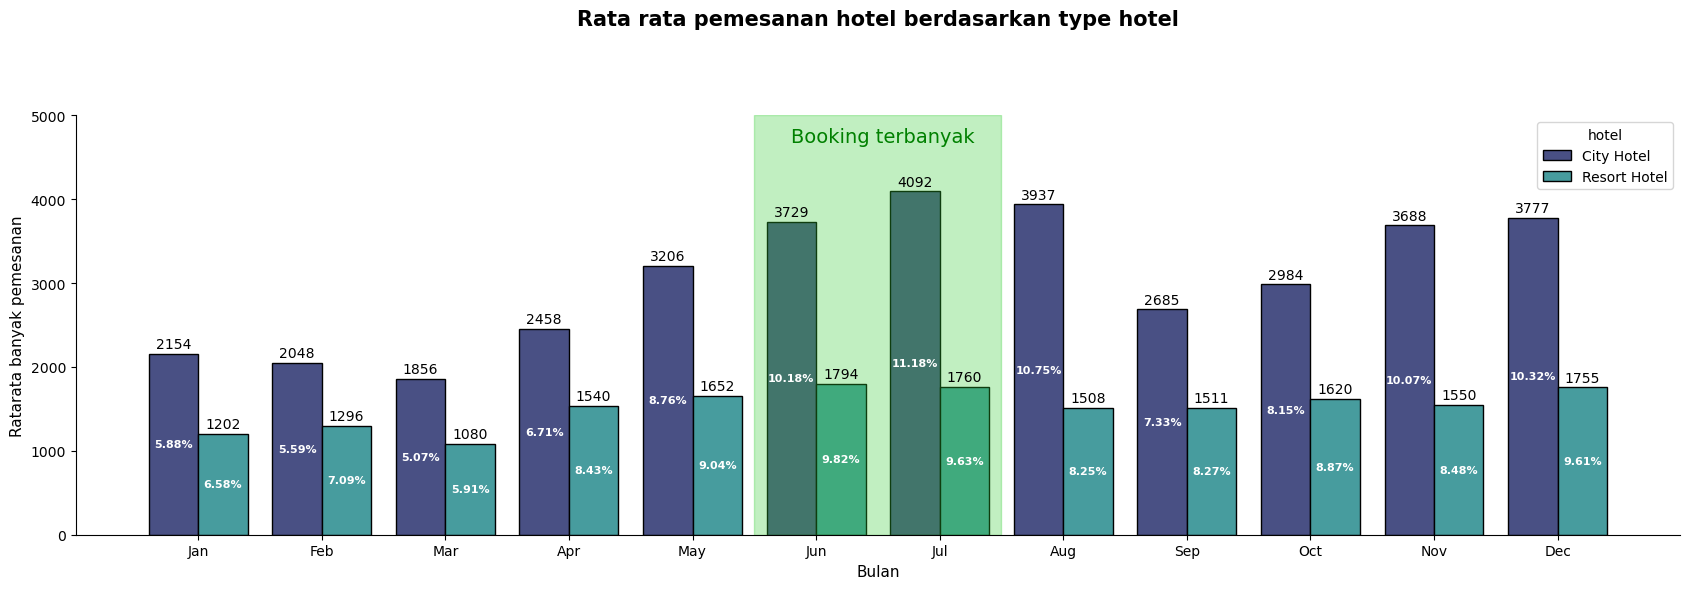

In [46]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Rata rata pemesanan hotel berdasarkan type hotel", fontsize=15, color='black', weight='bold', pad=65)
sns.barplot(x='arrival_date_month', y='avg_num_booking', data=df_month_final, hue='hotel', edgecolor='black', palette='mako')

plt.xlabel('Bulan', fontsize=11)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Ratarata banyak pemesanan', fontsize=11)
plt.ylim(0, 5000)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.stackplot(np.arange(4.5,7.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=4.80, y=4750, s='Booking terbanyak', fontsize=14, color='green', va='center')

plt.bar_label(ax.containers[0], ['5.88%', '5.59%', '5.07%', '6.71%', '8.76%', '10.18%', '11.18%', '10.75%', '7.33%', '8.15%', '10.07%', '10.32%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['6.58%', '7.09%', '5.91%', '8.43%', '9.04%', '9.82%', '9.63%', '8.25%', '8.27%', '8.87%', '8.48%', '9.61%'], label_type='center', color='white', weight='bold', fontsize=8)

sns.despine()
plt.tight_layout()
plt.savefig('avg_booking.png', dpi=200)